In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
file_path = 'wa_chat_aai.txt'
chat = []
with open(file_path,'r',encoding='utf-8') as file:
    for line in file:
        chat.append(line.strip())
chat

['11/09/21, 10:43\u202fam - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '11/09/21, 10:43\u202fam - Aai: <Media omitted>',
 '11/09/21, 10:43\u202fam - Aai: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:25\u202fpm - Yash: <Media omitted>',
 '11/09/21, 3:

In [124]:
# Removing all media omitted chats
chat = [i for i in chat if 'omitted' not in i.lower()]
chat = [i for i in chat if 'https' not in i.lower()]
chat = chat[1:]
chat

['11/09/21, 10:52\u202fpm - Aai: Hi',
 '11/09/21, 10:52\u202fpm - Aai: Hi',
 '11/09/21, 10:54\u202fpm - Aai: Hi',
 '11/09/21, 10:54\u202fpm - Aai: Hello',
 '12/09/21, 11:48\u202fam - Aai: नातवंडांवर  अपार प्रेम करणाऱ्या सर्व आजी आजोबांना मनापासून शुभेच्छा 🙏',
 '15/09/21, 10:00\u202fam - Aai: Dear Candidate, hall ticket for MHTCET-PCM is now available for download, please visit http://cetcell.mahacet.org/',
 '19/09/21, 8:33\u202fpm - Yash: Password 80005865',
 '21/09/21, 12:54\u202fpm - Aai: I had opted for email, didnt get one for a long time, but I got the certificate at the Vashi office after showing them the receipt I got online and a photocopy of my aadhar card.',
 '21/09/21, 12:54\u202fpm - Aai: Msg from Vishnu',
 '21/09/21, 12:54\u202fpm - Aai: Apaan Kay karayche??',
 '21/09/21, 1:17\u202fpm - Yash: Aapan speed post sathi opt kele ahe na',
 '21/09/21, 1:17\u202fpm - Yash: So cannot change',
 '21/09/21, 1:19\u202fpm - Aai: Check if we can apply for second copy',
 '21/09/21, 1:20\u

In [69]:
# Persons name to be added to the key in dictionary
print(chat[1])
person = chat[1].split(':')[1][8:]
person

11/09/21, 10:52 pm - Aai: Hi


'Aai'

In [72]:
# Text to be added to the value part
import nltk
text = nltk.sent_tokenize(':'.join(chat[102].split(':')[2:]))
text

[]

In [73]:
chat[24]

'27/09/21, 1:47\u202fpm - Yash: 12.40 la zala'

In [74]:
from collections import defaultdict
import nltk
no = []
ppl = defaultdict(list)
i=0
j=0
for line in chat:
    try:
        person = line.split(':')[1][8:]
        text = nltk.sent_tokenize(':'.join(line.split(':')[2:]))
        ppl[person].extend(text)
        j+=1
    except:
        no.append(line)
        i+=1
        pass
print(i,j)

1802 8766


In [76]:
# 8900 lines added and 1802 ignored.
no
ppl

defaultdict(list,
            {'Aai': [' Hi',
              ' Hi',
              ' Hi',
              ' Hello',
              ' नातवंडांवर  अपार प्रेम करणाऱ्या सर्व आजी आजोबांना मनापासून शुभेच्छा 🙏',
              ' Dear Candidate, hall ticket for MHTCET-PCM is now available for download, please visit http://cetcell.mahacet.org/',
              ' I had opted for email, didnt get one for a long time, but I got the certificate at the Vashi office after showing them the receipt I got online and a photocopy of my aadhar card.',
              ' Msg from Vishnu',
              ' Apaan Kay karayche?',
              '?',
              ' Check if we can apply for second copy',
              ' Tab ani I phone charging la laav',
              ' [22/09, 10:45 AM] Dr Trupti Paithane: Cengage mechanics 1 and 2, opitcs',
              ' CMC Computers.vcf (file attached)',
              ' Hi',
              ' Ahe',
              ' Call karte Tula ....in 5 min',
              ' Hi',
              ' Ok'

In [77]:
keys_to_delete = [key for key in ppl.keys() if key not in ['Aai','Yash']]

for key in keys_to_delete:
    del ppl[key]
len(ppl)

2

In [78]:
len(ppl['Aai'])
len(ppl['Yash'])

4046

In [79]:
ppl

defaultdict(list,
            {'Aai': [' Hi',
              ' Hi',
              ' Hi',
              ' Hello',
              ' नातवंडांवर  अपार प्रेम करणाऱ्या सर्व आजी आजोबांना मनापासून शुभेच्छा 🙏',
              ' Dear Candidate, hall ticket for MHTCET-PCM is now available for download, please visit http://cetcell.mahacet.org/',
              ' I had opted for email, didnt get one for a long time, but I got the certificate at the Vashi office after showing them the receipt I got online and a photocopy of my aadhar card.',
              ' Msg from Vishnu',
              ' Apaan Kay karayche?',
              '?',
              ' Check if we can apply for second copy',
              ' Tab ani I phone charging la laav',
              ' [22/09, 10:45 AM] Dr Trupti Paithane: Cengage mechanics 1 and 2, opitcs',
              ' CMC Computers.vcf (file attached)',
              ' Hi',
              ' Ahe',
              ' Call karte Tula ....in 5 min',
              ' Hi',
              ' Ok'

In [80]:
# Classification of Dialogues
# xml_posts() - returns a list of posts with each post represented as a structured object wit attrs like text,user
nltk.download('nps_chat')
posts = nltk.corpus.nps_chat.xml_posts()
posts[134].text

[nltk_data] Downloading package nps_chat to C:\Users\Yash
[nltk_data]     Phatak\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!


'JOIN'

In [81]:
# Feature Extraction from posts
def extract_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())]= True
    return features
fposts = [(extract_features(p.text),p.get('class')) for p in posts]
test_size = int(len(fposts)*0.1)
train_set, test_set = fposts[test_size:], fposts[:test_size]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [82]:
classifier.classify(extract_features('Hi there!'))

'Greet'

In [83]:
classifier.classify(extract_features('Do you want to watch a film later?'))

'ynQuestion'

In [118]:
# Passing the classifier model through each text in ppl
# Make a dictionary containing key as the Person and value as the emotion classified
emotions = defaultdict(list)

for key in ppl.keys():
    for i in ppl[key]:
        emotions[key].append(classifier.classify(extract_features(i)))
emotions['Aai']

['Greet',
 'Greet',
 'Greet',
 'Greet',
 'Statement',
 'Other',
 'nAnswer',
 'Statement',
 'ynQuestion',
 'ynQuestion',
 'Emphasis',
 'Clarify',
 'Other',
 'Emotion',
 'Greet',
 'Statement',
 'Statement',
 'Greet',
 'Statement',
 'Statement',
 'Reject',
 'System',
 'System',
 'ynQuestion',
 'Statement',
 'System',
 'Statement',
 'Statement',
 'Statement',
 'ynQuestion',
 'ynQuestion',
 'Statement',
 'Statement',
 'ynQuestion',
 'ynQuestion',
 'Statement',
 'Emotion',
 'ynQuestion',
 'ynQuestion',
 'Statement',
 'Statement',
 'Statement',
 'Statement',
 'Statement',
 'Statement',
 'Statement',
 'Statement',
 'Statement',
 'Statement',
 'Emphasis',
 'Statement',
 'Reject',
 'Statement',
 'Continuer',
 'ynQuestion',
 'ynQuestion',
 'Statement',
 'Statement',
 'Statement',
 'Statement',
 'Clarify',
 'Statement',
 'Statement',
 'Statement',
 'nAnswer',
 'Statement',
 'Statement',
 'Emotion',
 'Statement',
 'Statement',
 'Statement',
 'Statement',
 'Emotion',
 'Statement',
 'Statement',
 'St

In [105]:
message = ppl['Yash'][200]
print(message)
classifier.classify(extract_features(message))

 Oh ha rahila


'Emotion'

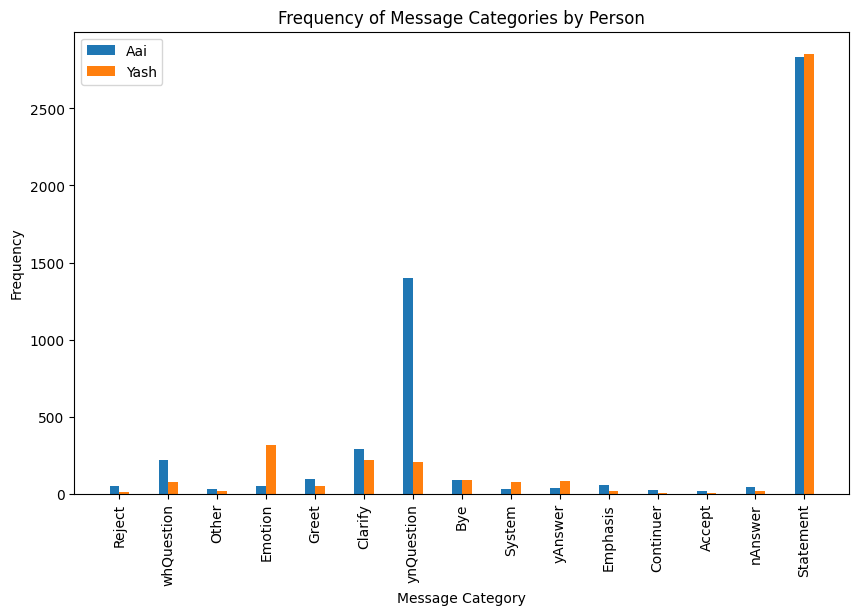

In [121]:
# Count the occurence of each emotions in the dictionary
from collections import Counter
message_count = defaultdict(Counter)
for person,messages in emotions.items():
    message_count[person] = Counter(messages)

# Preparing the data for Plotting 
categories = set(message for messages in emotions.values() for message in messages)
persons = list(emotions.keys())
counts_per_person = {person: [message_count[person][category] for category in categories] for person in persons}

# Plotting
width = 0.2  # Width of the bars
x = range(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))

for i, (person, counts) in enumerate(counts_per_person.items()):
    ax.bar([p + width*i for p in x], counts, width, label=person)

ax.set_xlabel('Message Category')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Message Categories by Person')
ax.set_xticks([p + 0.5 * width for p in x])
ax.set_xticklabels(categories,rotation=90)
ax.legend()

plt.show()

In [86]:
import emoji
import regex
from collections import Counter
def extract_emojis(str):
    emojis = regex.findall(r'\p{Emoji}',str)
    return emojis

for key,val in ppl.items():
    emojis = extract_emojis(str(ppl[key]))
    emojis = [emoji for emoji in emojis if not emoji.isdigit()]
    count = Counter(emojis).most_common()[:10]

    print("{}'s emojis:\n {} \n".format(key,emojis))
    print("Number of emojis used by {}: {}\n".format(key,len(emojis)))
    print("Most Common emojis used: {}\n\n".format(count))

Aai's emojis:
 ['🙏', '*', '*', '😂', '😄', '👌', '🏻', '👌', '🏻', '👏', '🏼', '👏', '🏼', '👍', '🏼', '😘', '😘', '😄', '🙏', '🏼', '👍', '🏼', '😃', '👍', '🏼', '👍', '🏼', '😊', '😃', '👍', '🏼', '❤', '👍', '🏼', '👍', '🏼', '😊', '👍', '🏼', '🤟', '🏼', '😃', '👆', '🏻', '🙄', '🙄', '👍', '🏼', '👍', '🏼', '😖', '😡', '🤟', '🏼', '👍', '🏼', '🤟', '🏼', '😘', '😘', '🥰', '😘', '❤', '👍', '🏼', '👍', '🏼', '🙄', '😘', '😘', '🤟', '🏼', '👍', '🏼', '🥰', '👌', '🏻', '👌', '🏻', '👌', '🏻', '👍', '🏼', '👍', '🏼', '👍', '🏼', '😘', '😘', '👍', '🏼', '😘', '🤟', '🏼', '🙏', '🏼', '😃', '🤟', '🏼', '🤟', '🏼', '👏', '🏼', '👏', '🏼', '👏', '🏼', '😃', '😍', '😂', '😂', '😃', '😃', '👆', '🏻', '😍', '😊', '😊', '😳', '😳', '😳', '🥰', '😘', '👍', '🏼', '🤟', '🏼', '🥰', '🤟', '🏼', '😃', '👍', '🏼', '🥰', '😍', '😃', '🥰', '😘', '❤', '😊', '😘', '😃', '😘', '😃', '😍', '😃', '👍', '🏼', '😘', '😃', '👍', '🏼', '😃', '😘', '😬', '😜', '😘', '😘', '🙏', '🏼', '😘', '😘', '😘', '😔', '😘', '😢', '🙄', '😬', '🤟', '🏼', '😍', '😍', '👍', '🏼', '😃', '🤟', '🏼', '🙄', '😬', '🌹', '🌹', '😃', '👍', '🏼', '😃', '😃', '😃', '😃', '🙄', '❤', '😘', '👍', '🏼', '😍', '😍', '😍', '😍',